<a href="https://colab.research.google.com/github/janunayak/miniproject/blob/master/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [3]:
from google.colab import files


uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [7]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Understanding the data.

In [10]:
df.shape

(7043, 21)

In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data manipulation

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [17]:
df['TotalCharges'].isnull().sum()

11

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
for i in df.columns:
    print(df[i].value_counts())

customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64
gender
Male      3549
Female    3483
Name: count, dtype: int64
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    15

In [22]:
df['PaymentMethod']=df['PaymentMethod'].replace({'Bank transfer (automatic)':'Automatic','Credit card (automatic)':'Automatic'})
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Automatic,3063
Electronic check,2365
Mailed check,1604


Exploratory Data Analysis (EDA)

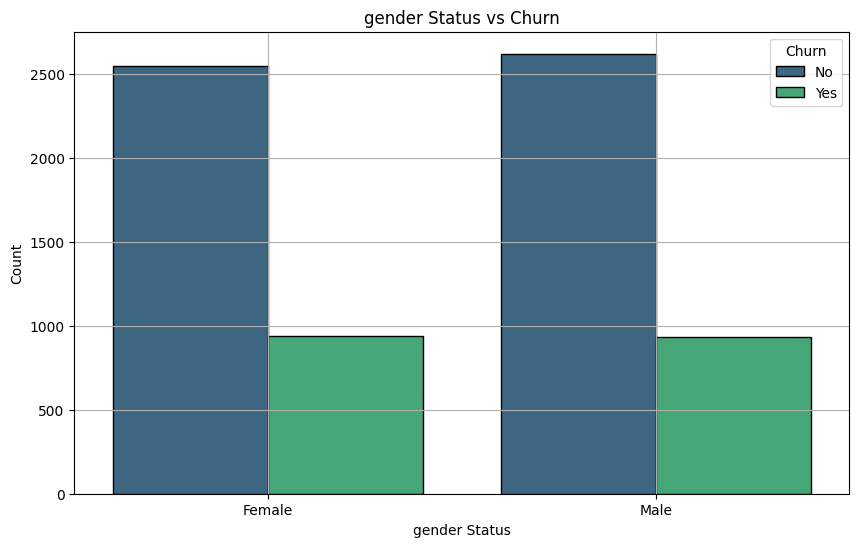

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette='viridis', edgecolor='black')

plt.title('gender Status vs Churn')
plt.xlabel('gender Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

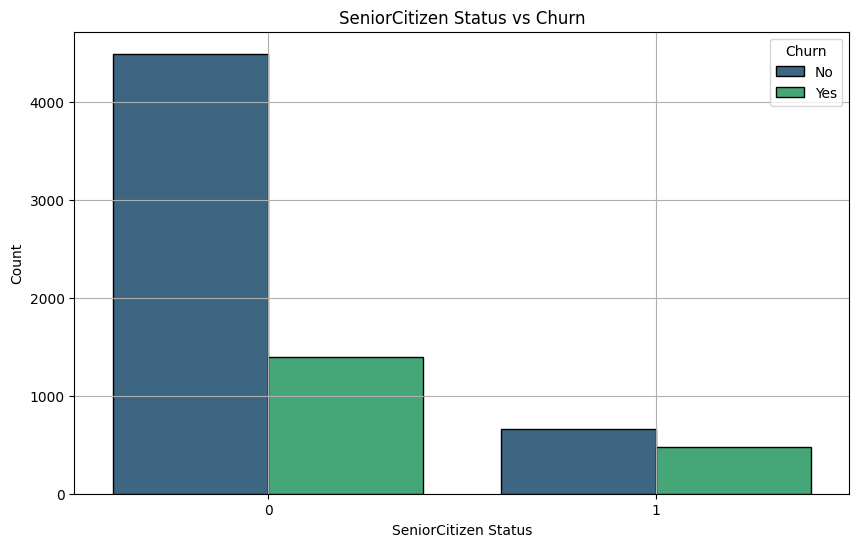

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='viridis', edgecolor='black')

plt.title('SeniorCitizen Status vs Churn')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

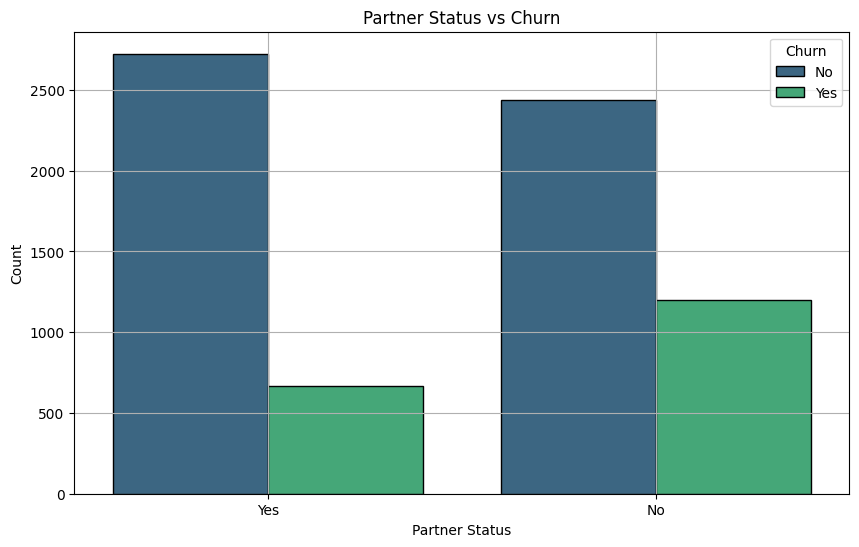

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette='viridis', edgecolor='black')

plt.title('Partner Status vs Churn')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

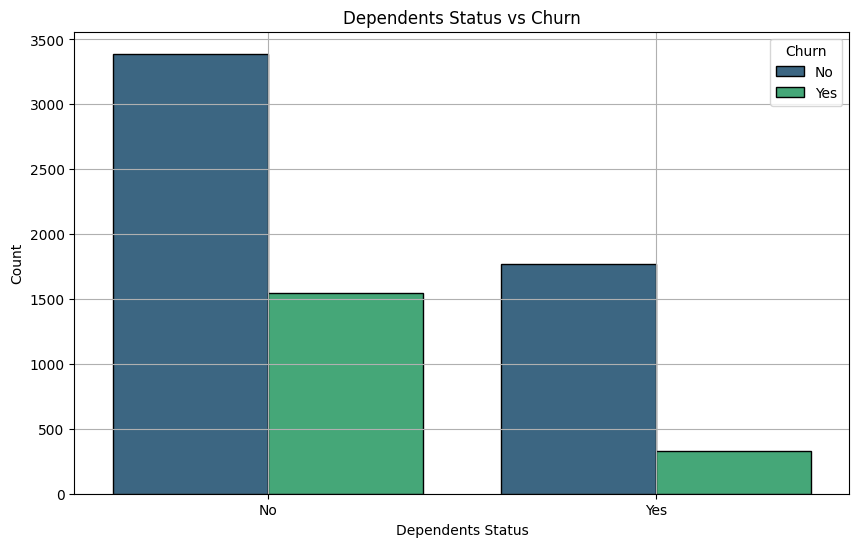

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='viridis', edgecolor='black')

plt.title('Dependents Status vs Churn')
plt.xlabel('Dependents Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

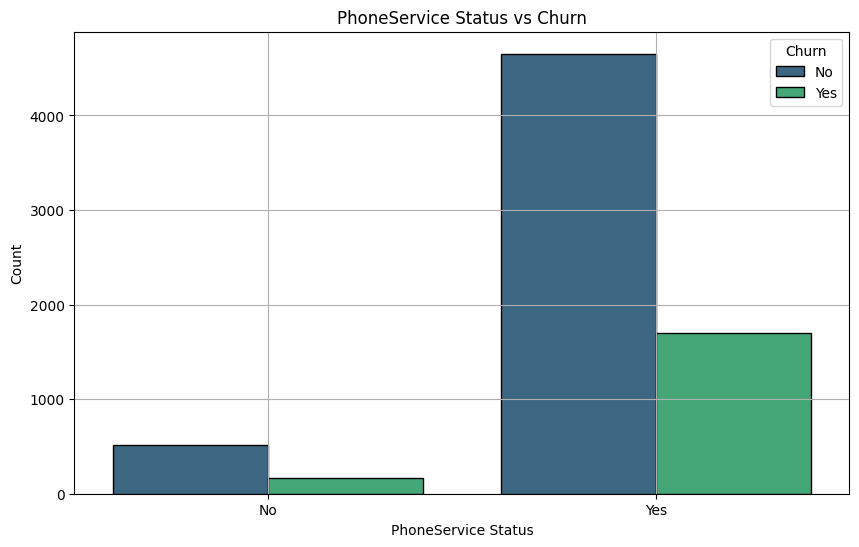

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='viridis', edgecolor='black')

plt.title('PhoneService Status vs Churn')
plt.xlabel('PhoneService Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

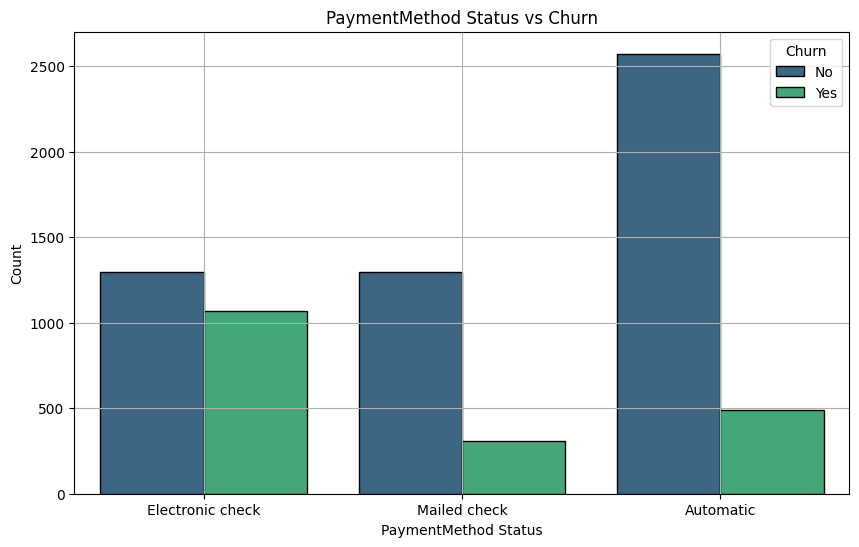

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis', edgecolor='black')

plt.title('PaymentMethod Status vs Churn')
plt.xlabel('PaymentMethod Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

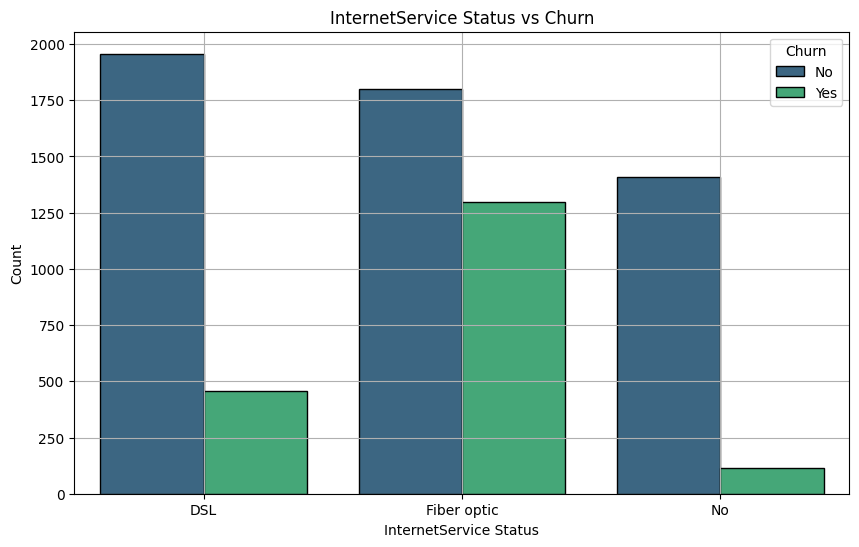

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis', edgecolor='black')

plt.title('InternetService Status vs Churn')
plt.xlabel('InternetService Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

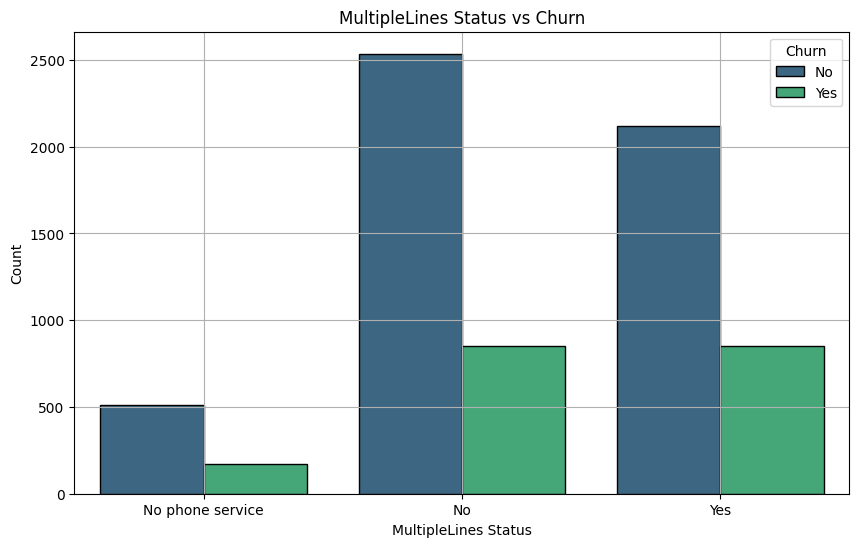

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='viridis', edgecolor='black')

plt.title('MultipleLines Status vs Churn')
plt.xlabel('MultipleLines Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

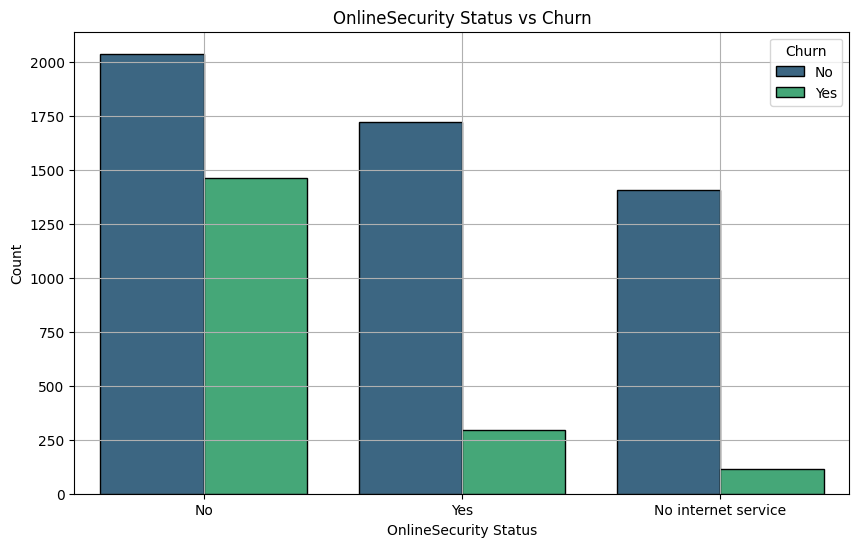

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='viridis', edgecolor='black')

plt.title('OnlineSecurity Status vs Churn')
plt.xlabel('OnlineSecurity Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

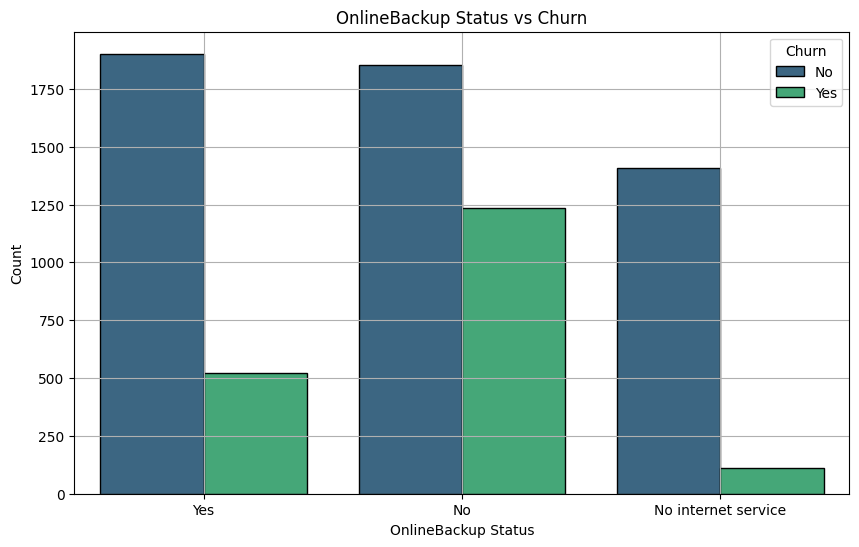

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='viridis', edgecolor='black')

plt.title('OnlineBackup Status vs Churn')
plt.xlabel('OnlineBackup Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

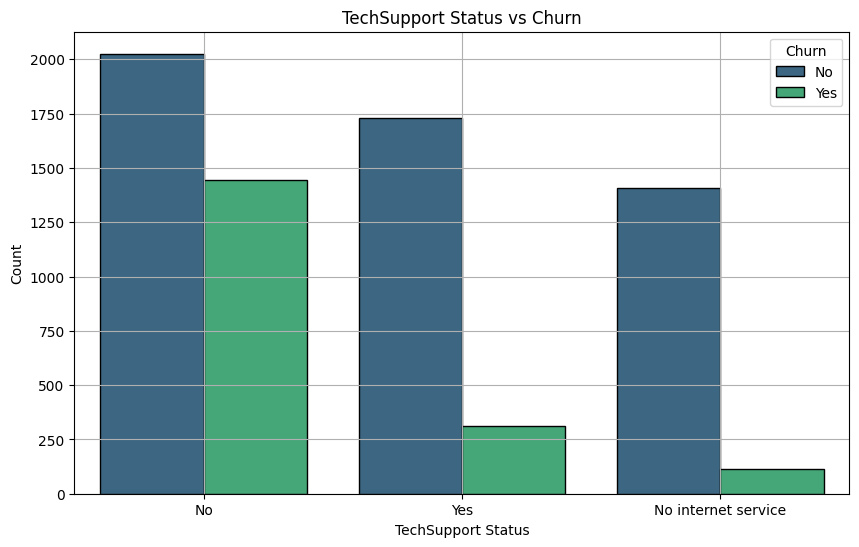

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='viridis', edgecolor='black')

plt.title('TechSupport Status vs Churn')
plt.xlabel('TechSupport Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

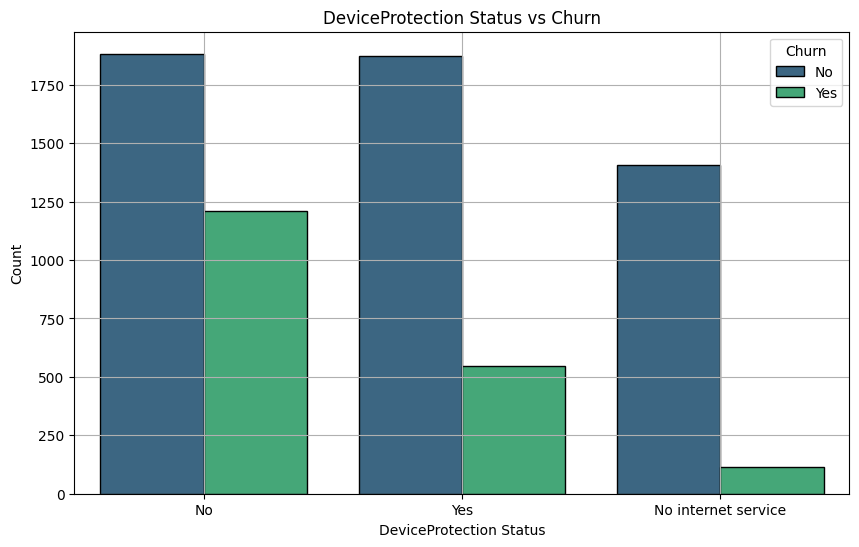

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='viridis', edgecolor='black')

plt.title('DeviceProtection Status vs Churn')
plt.xlabel('DeviceProtection Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Data processing

In [35]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,2,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,2,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,2,84.80,1990.50,0
7039,1524,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,0,103.20,7362.90,0
7040,3358,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,1,29.60,346.45,0
7041,5923,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,2,74.40,306.60,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int64  
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  
 17  

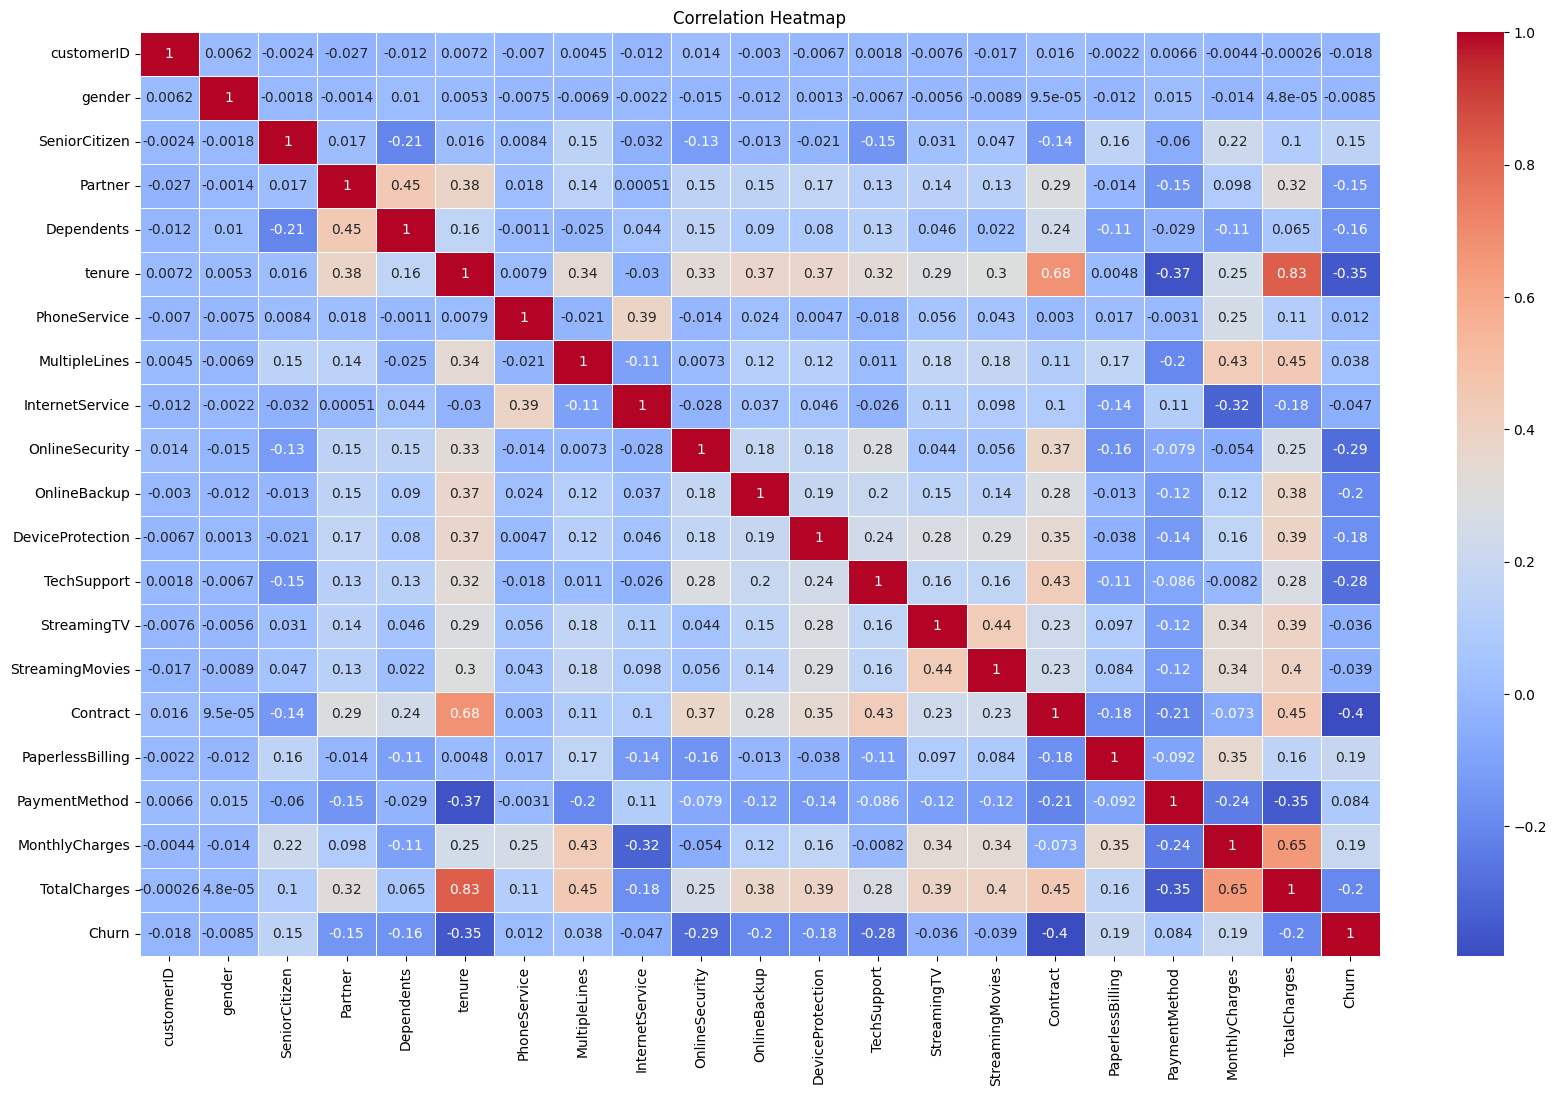

In [37]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [39]:
x=df.drop(columns=['Churn','gender','MultipleLines','InternetService','StreamingTV','PaymentMethod'])
y=df['Churn']

Here I noticed an imbalance in the values in the Target column so I use SMOTE.

In [40]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [41]:
smote = SMOTE(random_state=42,k_neighbors=15)
X_resampled, y_resampled = smote.fit_resample(x, y)

print(Counter(y_resampled))

Counter({0: 5163, 1: 5163})


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [43]:
columns_to_scale = ['tenure','TotalCharges','MonthlyCharges']
scaler = StandardScaler()

x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

In [44]:
y_test.shape

(3098,)

In [45]:
x_test.shape

(3098, 15)

In [46]:
x_train.shape

(7228, 15)

In [47]:
y_train.shape

(7228,)

KNN

In [48]:
model=KNeighborsClassifier(n_neighbors=17)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.5319561007101355


LogisticRegression

In [50]:
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.802775984506133
Confusion Matrix:
[[1154  395]
 [ 216 1333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1549
           1       0.77      0.86      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector MAchine

In [52]:
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print(f'SVM accuracy is :{accuracy_svc:.2f}')

SVM accuracy is :0.50


In [53]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))

print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))

KeyboardInterrupt: 

RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=250, max_depth=8)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.8675982291090205
Testing Accuracy: 0.8244028405422853


In [ ]:
param_grid = {
    'n_estimators': [70, 100,120, 150,250],
    'max_depth': [5, 7,8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(x_test)

print("Optimized Testing Accuracy:", accuracy_score(y_test, y_test_pred))